In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('prepd-data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,None,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",None,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,None,China


In [3]:
corrmatrix = df.corr()
corrmatrix.head()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003257,-0.010086,-0.008910,0.011563
Age,-0.003257,1.000000,0.149256,0.201691,-0.118355
Height,-0.010086,0.149256,1.000000,0.799054,-0.082034
Weight,-0.008910,0.201691,0.799054,1.000000,-0.102196
Year,0.011563,-0.118355,-0.082034,-0.102196,1.000000


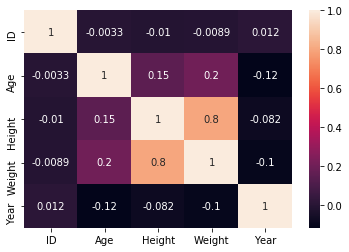

In [4]:
sb.heatmap(corrmatrix, annot=True)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


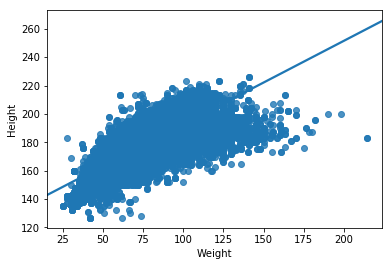

In [5]:
# We have maximum correlation between Height and and Weight attributes.

sb.regplot(data=df, x='Weight', y='Height')

In [6]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [7]:
x = df[['Weight']].values
y = df['Height'].values

xa_train, xa_test, ya_train, ya_test = train_test_split(x, y, test_size=0.3)

lreg = LinearRegressionGD()
lreg.fit(x, y)

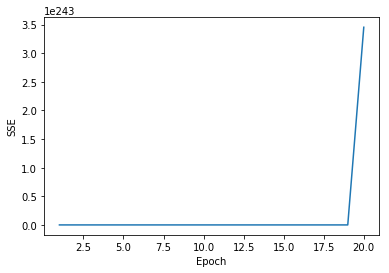

In [8]:
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3)

lreg = LinearRegressionGD()
lreg.fit(x_std, y_std)

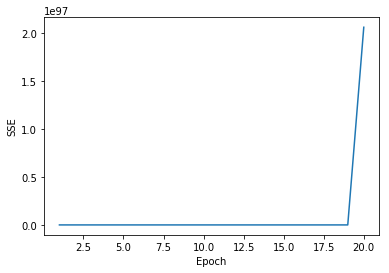

In [10]:
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

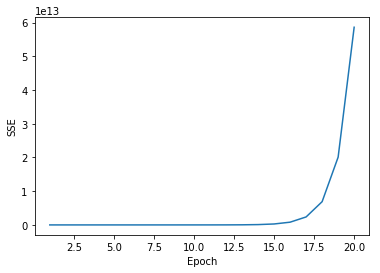

In [11]:
lreg = LinearRegressionGD(eta=0.00001)
lreg.fit(x_std, y_std)
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

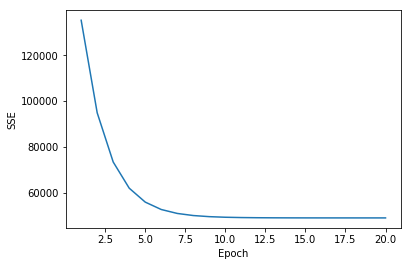

In [12]:
lreg = LinearRegressionGD(eta=0.000001)
lreg.fit(x_std, y_std)
plt.plot(range(1, lreg.n_iter+1), lreg.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [13]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

Slope: 0.798
Intercept: 0.000


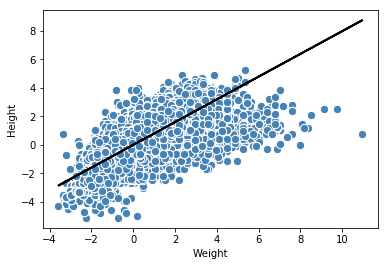

In [14]:
print('Slope: %.3f' % lreg.w_[1])
print('Intercept: %.3f' % lreg.w_[0])

lin_regplot(x_std, y_std, lreg)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Slope: 0.590
Intercept: 133.706
Accuracy: 0.64


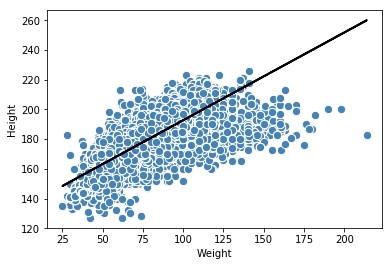

In [15]:
# Using sklearn

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xa_train, ya_train)
y_pred = slr.predict(x_test)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

print('Accuracy: %.2f' % slr.score(xa_test, ya_test))

lin_regplot(x, y, slr)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

Slope: 0.799
Intercept: -0.000
Accuracy: 0.64


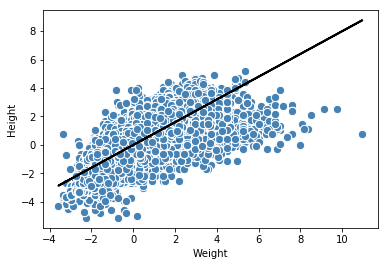

In [16]:
slr = LinearRegression()
slr.fit(x_train, y_train)
y_pred = slr.predict(x_test)

print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

print('Accuracy: %.2f' % slr.score(x_test, y_test))

lin_regplot(x_std, y_std, slr)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

Slope: 0.799
Intercept: -0.000
Accuracy: 0.64


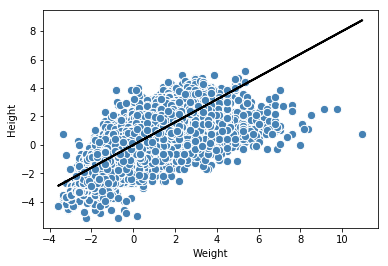

In [17]:
# Ridge regression

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=0.1)
rdg.fit(x_train, y_train)
y_pred = rdg.predict(x_test)
print('Slope: %.3f' % rdg.coef_[0])
print('Intercept: %.3f' % rdg.intercept_)

print('Accuracy: %.2f' % rdg.score(x_test, y_test))

lin_regplot(x_std, y_std, rdg)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

Slope: 0.699
Intercept: -0.000
Accuracy: 0.63


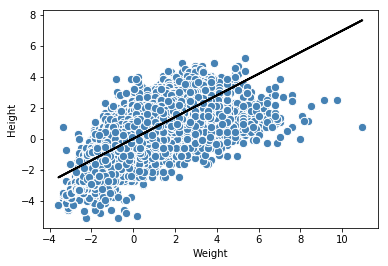

In [18]:
# Lasso regression

from sklearn.linear_model import Lasso

las = Lasso(alpha=0.1)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

print('Slope: %.3f' % las.coef_[0])
print('Intercept: %.3f' % las.intercept_)

print('Accuracy: %.2f' % las.score(x_test, y_test))

lin_regplot(x_std, y_std, las)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [19]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,)
x, y = x_std, y_std
ransac.fit(x,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

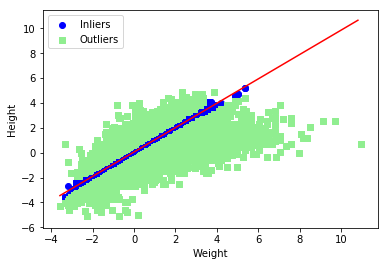

In [20]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(x.min(), x.max(),1.8)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(x[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers') 
plt.scatter(x[outlier_mask], y[outlier_mask],c='lightgreen', marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(loc = 'upper left')
plt.show()

In [21]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)
print('Score: %.3f' % ransac.score(x,y))

Slope: 0.979
Intercept: 0.060
Score: 0.603
